In [434]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [435]:
from sklearn.datasets._samples_generator import make_regression
X, y = make_regression(n_samples=200, n_features=1, n_informative=1, noise=20, bias=30, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

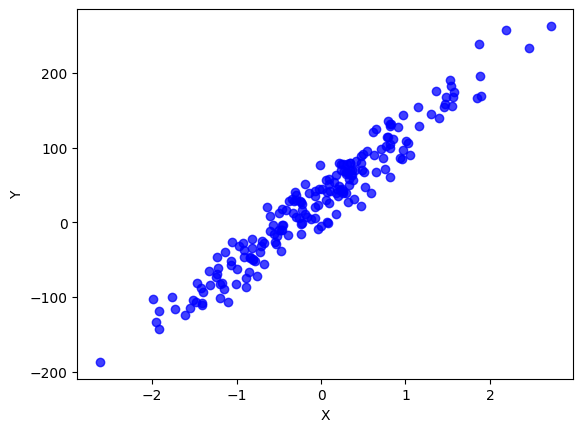

In [436]:
plt.scatter(X, y, c='blue', alpha=.75, marker='o')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### Univariate Linear Regression

In [437]:
def h(X, w):
    return w[0] + w[1] * X[:, 0]

In [438]:
def compute_loss(y, y_pred):
    return np.mean((y - y_pred) ** 2)

In [439]:
def compute_grad(w, X, y):
    n = len(X)
    g = [0]*2
    g[0] = 1/n * np.sum(h(X,w)-np.array(y)) #bias
    g[1] = 1/n * np.sum(h(X,w)-np.array(y)*np.array(X[:,0])) #weight
    
    return g

In [440]:
def gradient_descent(w, X, y, lr=1e-4, epochs=100):

    for epoch in range(epochs):
        grad = compute_grad(w, X, y)
        w[0] -= lr*grad[0] #bias
        w[1] -= lr*grad[1] #weight

    return w

In [441]:
w = [0,-1]
w = gradient_descent(w,X_train,y_train,0.01,150)

y_pred_train = h(X_train, w)
y_pred_test = h(X_test, w)

print(f'Intercept: {w[0]}')
print(f'Coefficient: {w[1]}')
print(f'MSE Train: {compute_loss(y_train, y_pred_train)}')
print(f'MSE Test: {compute_loss(y_test, y_pred_test)}')

Intercept: 25.043974743008704
Coefficient: 84.48745402393105
MSE Train: 457.16498615513103
MSE Test: 528.3711072690928


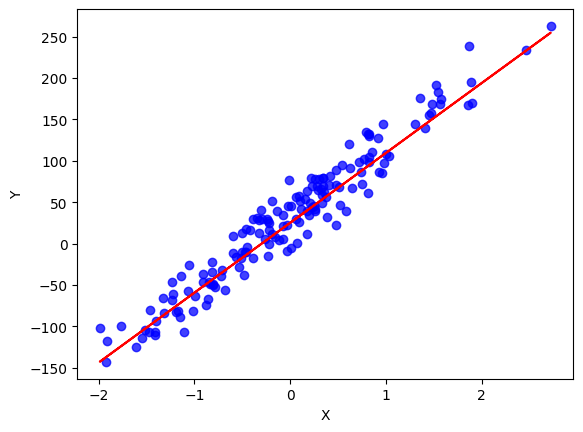

In [442]:
plt.scatter(X_train, y_train, c='blue', alpha=.75, marker='o')
plt.plot(X_train, y_pred_train, c='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

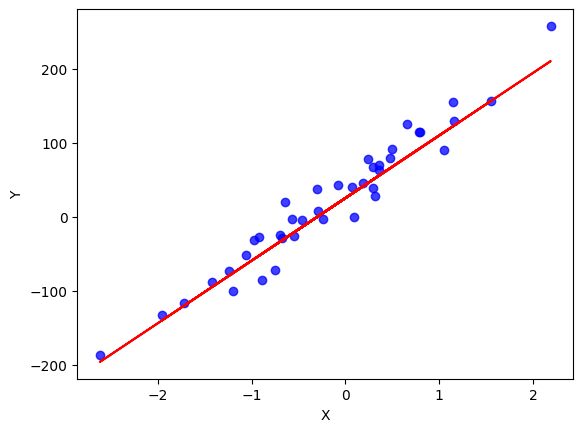

In [443]:
plt.scatter(X_test, y_test, c='blue', alpha=.75, marker='o')
plt.plot(X_test, y_pred_test, c='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [444]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Get predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Print model parameters
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient: {model.coef_[0]:.2f}")
print(f'MSE Train: {compute_loss(y_train, y_pred_train)}')
print(f'MSE Test: {compute_loss(y_test, y_pred_test)}')

Intercept: 32.45
Coefficient: 86.51
MSE Train: 399.21225903004023
MSE Test: 437.54985402070196


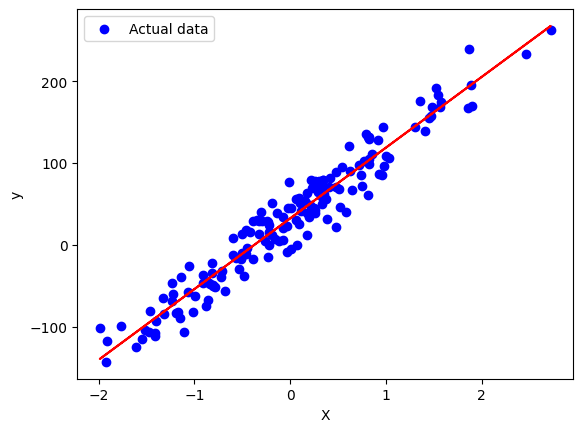

In [445]:
# Plot results
plt.scatter(X_train, y_train, color='blue', label="Actual data")
plt.plot(X_train, y_pred_train, color='red')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

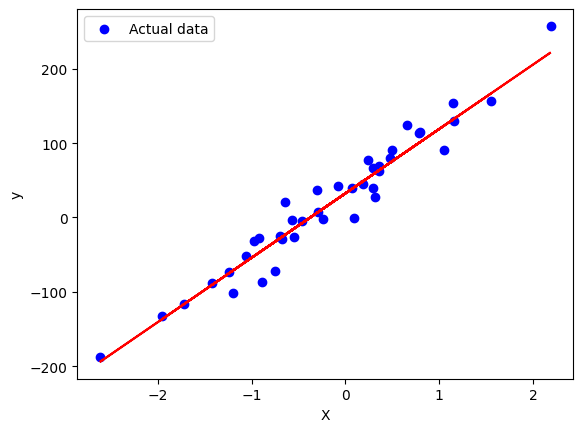

In [446]:
# Plot results
plt.scatter(X_test, y_test, color='blue', label="Actual data")
plt.plot(X_test, y_pred_test, color='red')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

### Multivariate Linear Regression

In [498]:
from sklearn.datasets._samples_generator import make_regression
X, y = make_regression(n_samples=200, n_features=3, n_informative=1, noise=20, bias=30, random_state=42)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).view(-1,1)

In [546]:
#Simply linear class
import torch

class Linear():
    def __init__(self, x):
        n_features = x.shape[1]
        self.w = torch.randn(n_features, 1) * torch.sqrt(torch.tensor(2.0 / n_features)) #kaiming normal initialization
        self.b = torch.zeros(1)

    def __call__(self, x):
        y_pred = x @ self.w + self.b

        return y_pred


#Gradient Descent
def compute_loss(y, y_pred):
    error = y - y_pred
    loss = torch.mean(error ** 2)

    return loss


def compute_grad(x, y, y_pred):
    n = len(y)
    error = y_pred - y
    grad_w = (x.T @ error) / n
    grad_b = torch.mean(error)

    return grad_w, grad_b

In [547]:
model = Linear(X)

In [548]:
epochs = 1000
lr = 1e-2

for _ in range(epochs):
    y_pred = model(X)   
    grad_w, grad_b = compute_grad(X, y, y_pred)
    
    
    model.w -= lr*grad_w
    model.b -= lr*grad_b

y_pred = model(X)
compute_loss(y, y_pred)

tensor(422.6188)

In [549]:
# Initialize and train the model
model = LinearRegression()
model.fit(X.numpy(), y.numpy())

# Get predictions
y_pred_train = model.predict(X)

print(f'MSE Train: {compute_loss(y, y_pred_train)}')

MSE Train: 422.61871337890625


/var/folders/nz/ht8s09bd1knct30kv0qm6c040000gn/T/ipykernel_17224/2489345236.py:18: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  error = y - y_pred


In [550]:
y.shape

torch.Size([200, 1])

In [551]:
y_pred.shape

torch.Size([200, 1])